<a href="https://colab.research.google.com/github/SouravUpadhyay7/Hands_On/blob/main/Implementation_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv', delimiter=',', encoding='ISO-8859-1')

In [6]:
# Records of the Dataset: Displaying the first 10 records.

data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
# Information of the Columns: Checking data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276175 entries, 0 to 276174
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    276175 non-null  object 
 1   StockCode    276175 non-null  object 
 2   Description  275168 non-null  object 
 3   Quantity     276174 non-null  float64
 4   InvoiceDate  276174 non-null  object 
 5   UnitPrice    276174 non-null  float64
 6   CustomerID   197298 non-null  float64
 7   Country      276174 non-null  object 
dtypes: float64(3), object(5)
memory usage: 16.9+ MB


In [8]:
# Description of Numeric Features: Statistical summary of numeric features.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,276174.0,9.285371,208.578504,-74215.0,1.00,3.0,10.00,74215.0
UnitPrice,276174.0,5.049635,113.847672,0.0,1.25,2.1,4.15,38970.0
CustomerID,197298.0,15287.916989,1730.488029,12346.0,13854.00,15152.0,16839.00,18287.0


In [9]:
# Checking for Null Values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1007
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,78877
Country,1


In [10]:
# Shape of the Dataset
data.shape

(276175, 8)

In [11]:
# Delete Missing Records
data.dropna(inplace=True)

In [12]:
# Handling Negative Values
data = data[data['Quantity'] > 0]
data[data['UnitPrice']<0].shape[0]

0

In [13]:
# Drop the negative values or quantity
data.drop(data[data['Quantity'] < 0].index, inplace=True)

In [14]:
# Calculating Total Sales or Monetary Value
data['Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,2205.95
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,1561.81
...,...,...
3089,18273.0,51.00
3090,18280.0,180.60
3091,18281.0,80.82
3092,18283.0,985.77


In [15]:
# Calculating Number of Transactions
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,102
2,12348.0,28
3,12350.0,17
4,12352.0,38
...,...,...
3089,18273.0,1
3090,18280.0,10
3091,18281.0,7
3092,18283.0,400


In [16]:
# Calculating Last Transaction

#Converting 'InvoiceDate' to DateTime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Calculating 'Last Transaction' Days:
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
#Grouping by 'CustomerID' and 'Country' and Calculating Maximum 'Last Transaction'
lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
#Merging with Number of Transactions
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
print(lt)
print(new_df)

      CustomerID         Country  Last Transaction
0        12346.0  United Kingdom               187
1        12347.0         Iceland               228
2        12348.0         Finland               219
3        12350.0          Norway               171
4        12352.0          Norway               157
...          ...             ...               ...
3095     18273.0  United Kingdom               119
3096     18280.0  United Kingdom               139
3097     18281.0  United Kingdom                42
3098     18283.0  United Kingdom               198
3099     18287.0  United Kingdom                63

[3100 rows x 3 columns]
      CustomerID         Country  Last Transaction  InvoiceNo     Sales
0        12346.0  United Kingdom               187          1  77183.60
1        12347.0         Iceland               228        102   2205.95
2        12348.0         Finland               219         28   1487.24
3        12350.0          Norway               171         17    334.40
4  

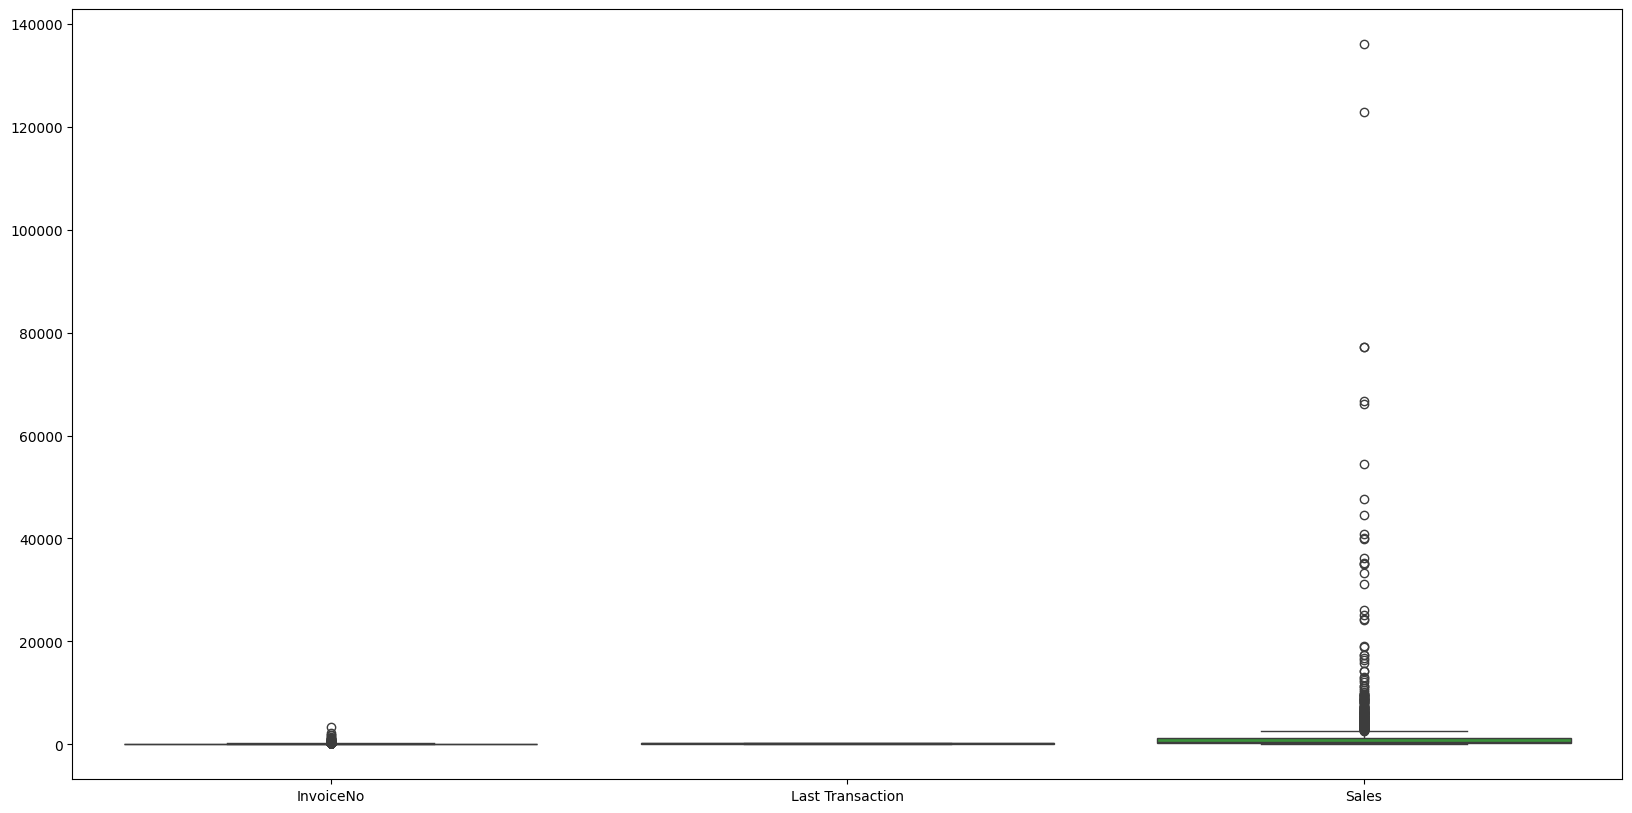

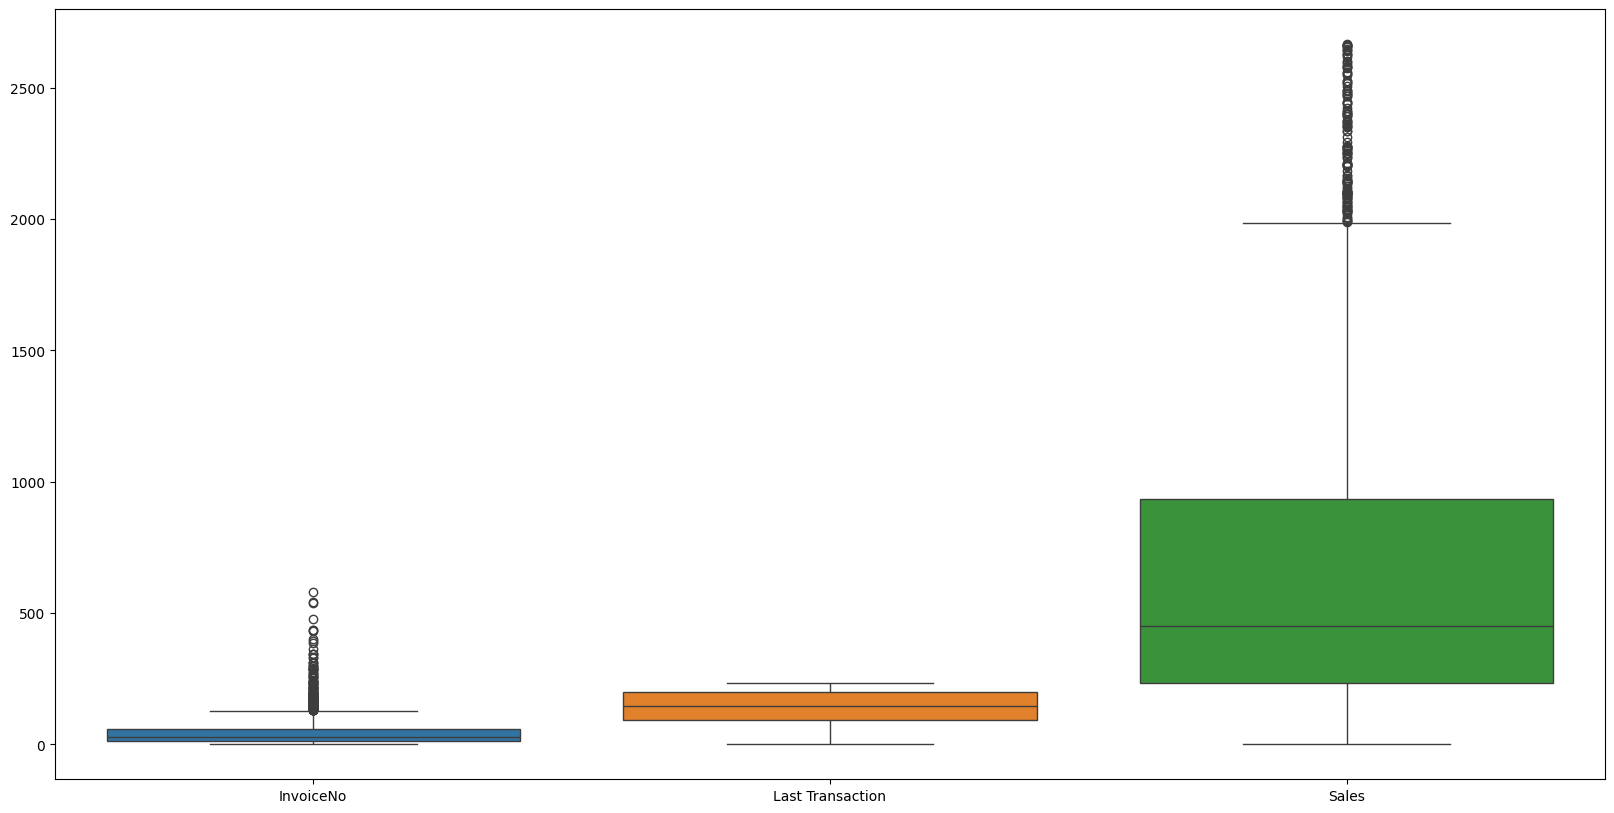

In [17]:
# Removing Outliers
# It includes Identifying and removing outliers from the dataset to improve clustering accuracy.

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

In [18]:
# Normalization of Given Dataset using MinMaxScaler
# We select relevant columns ('Last Transaction', 'InvoiceNo', 'Sales') from the dataset for normalization.

# The MinMaxScaler is applied to scale the selected features between 0 and 1.
# The scaled data is converted back to a DataFrame and assigned column names.



from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.970213,0.174439,0.827322,Iceland
1,0.931915,0.046632,0.557421,Finland
2,0.727660,0.027634,0.124490,Norway
3,0.668085,0.063903,0.585425,Norway
4,0.276596,0.005181,0.032334,Bahrain
...,...,...,...,...
2805,0.506383,0.000000,0.018063,United Kingdom
2806,0.591489,0.015544,0.066733,United Kingdom
2807,0.178723,0.010363,0.029262,United Kingdom
2808,0.842553,0.689119,0.369102,United Kingdom


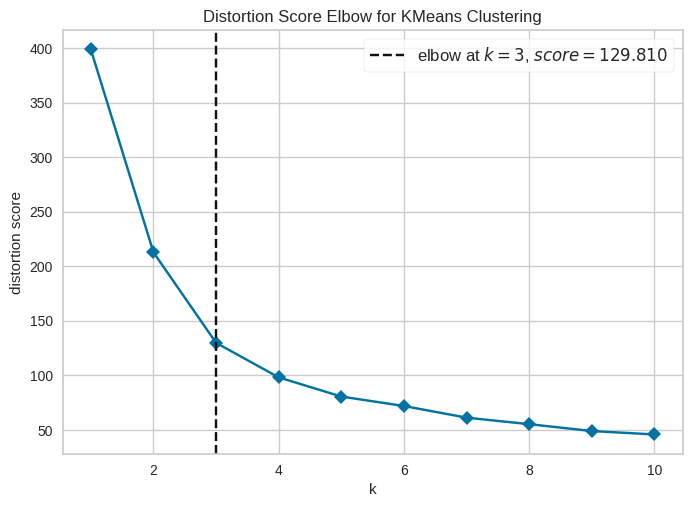

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# K-Means Clustering - Plotting the Graph using Elbow Method
# We prepare the dataset for clustering by dropping the 'Country' column.

# The Elbow Method is employed to determine the optimal number of clusters for K-Means.
# The Yellowbrick library's KElbowVisualizer is utilized to visualize the elbow plot.
# K-Means clustering is performed with the chosen number of clusters, and cluster assignments are added to the DataFrame.
# The centroids of the clusters are computed and displayed.



df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [20]:
# Model Evaluation

from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, model.labels_, metric='euclidean')
print(score)

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

0.3573877799493467


,Last Transaction,InvoiceNo,Sales,clusters_hierarchial
0,0.970213,0.174439,0.827322,2
1,0.931915,0.046632,0.557421,2
2,0.727660,0.027634,0.124490,0
3,0.668085,0.063903,0.585425,2
4,0.276596,0.005181,0.032334,1
5,0.395745,0.098446,0.404263,1
6,0.319149,0.020725,0.171432,1
7,0.051064,0.018998,0.180993,1
8,0.263830,0.075993,0.405833,1
9,0.629787,0.015544,0.070225,0
